Before running change runtime to TPU and check that available RAM is above 300GB

In [ ]:
!pip install kaggle

If and only if running BOX [3] doesn't work
1. Kaggle > Settings > API > Create API-Token
2. Google Colab > Upload > kaggle
3. Run box[2]

In [ ]:
''' Do not run this box unless box[3] doesn't work'''
!mkdir /.kaggle
!mv kaggle.json /.kaggle
!mv /.kaggle /root/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c quora-question-pairs

 99% 305M/309M [00:05<00:00, 65.0MB/s]
100% 309M/309M [00:05<00:00, 57.0MB/s]


In [ ]:
!unzip quora-question-pairs.zip

Archive:  quora-question-pairs.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: train.csv.zip           


Dataset is now train_data

In [ ]:
import pandas as pd
train_data = pd.read_csv('train.csv.zip')

Downloading and importing libraries

In [ ]:
!pip install seaborn wordcloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # We use regular expressions for data cleaning
plt.style.use('ggplot')
pd.set_option('display.max_colwidth', None)
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import jaccard_score
from nltk.metrics import edit_distance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow")

In [ ]:
print(train_data.isna().sum())
train_data.dropna(inplace=True)
train_data

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket programming language of the latest version?,How many keywords are there in PERL Programming Language in the latest version?,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,"What is the approx annual cost of living while studying in UIC Chicago, for an Indian student?","I am having little hairfall problem but I want to use hair styling product. Which one should I prefer out of gel, wax and clay?",0


#Skipping Data Visualization
heading right into the modeling

this shows Jaccard Similarity, should be 1 on duplicates

In [ ]:
from nltk.metrics import jaccard_distance
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Filter the DataFrame to include only rows where is_duplicate is 1
duplicate_questions = train_data[train_data['is_duplicate'] == 1].sample(frac=1/3, random_state=42)  # Adjust the fraction and random_state as needed

# Create a CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(duplicate_questions['question1'] + duplicate_questions['question2'])

# Vectorize the questions
q1_vectorized = vectorizer.transform(duplicate_questions['question1'])
q2_vectorized = vectorizer.transform(duplicate_questions['question2'])

# Convert to binary format
q1_binary = np.asarray(q1_vectorized.toarray(), dtype=bool).astype(int)
q2_binary = np.asarray(q2_vectorized.toarray(), dtype=bool).astype(int)

# Flatten the arrays
q1_flat = q1_binary.ravel()
q2_flat = q2_binary.ravel()

# Calculate Jaccard similarity using NLTK
jaccard_similarity = 1 - jaccard_distance(set(q1_flat), set(q2_flat))

print(f"Jaccard Similarity between a fraction of duplicate questions: {jaccard_similarity}")

Jaccard Similarity between a fraction of duplicate questions: 1.0


In [ ]:
from nltk.metrics import jaccard_distance
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Filter the DataFrame to include only rows where is_duplicate is 0
non_duplicate_questions = train_data[train_data['is_duplicate'] == 0].sample(frac=1/3, random_state=42)  # Adjust the fraction and random_state as needed
# Create a CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(non_duplicate_questions['question1'] + non_duplicate_questions['question2'])

# Vectorize the questions
q1_vectorized = vectorizer.transform(non_duplicate_questions['question1'])
q2_vectorized = vectorizer.transform(non_duplicate_questions['question2'])

# Convert to binary format
q1_binary = np.asarray(q1_vectorized.toarray(), dtype=bool).astype(int)
q2_binary = np.asarray(q2_vectorized.toarray(), dtype=bool).astype(int)

# Flatten the arrays
q1_flat = q1_binary.ravel()
q2_flat = q2_binary.ravel()

# Calculate Jaccard similarity using NLTK
jaccard_similarity = 1 - jaccard_distance(set(q1_flat), set(q2_flat))

print(f"Jaccard Similarity between a fraction of non-duplicate questions: {jaccard_similarity}")

Jaccard Similarity between a fraction of non-duplicate questions: 1.0


Since Jaccard Similarity between duplicates and non-duplicates is both 1. Jaccard Similarity is not a good metric.

Create Duplicate_Questions

In [ ]:
vectorizer = CountVectorizer()
duplicate_questions = train_data[train_data['is_duplicate'] == 1].sample(frac=0.5)
vectorizer.fit(duplicate_questions['question1'] + duplicate_questions['question2'])

# Vectorize all questions
all_questions_vectorized = vectorizer.transform(duplicate_questions['question1'] + duplicate_questions['question2']).toarray().astype(bool)

# Reset index for proper alignment
duplicate_questions = duplicate_questions.reset_index(drop=True)
all_questions_vectorized_df = pd.DataFrame(all_questions_vectorized)

levenshtein_distances = []

for i in range(len(duplicate_questions)):
    row_vectorized = vectorizer.transform([duplicate_questions['question1'][i] + duplicate_questions['question2'][i]]).toarray().astype(bool).ravel()

    # Calculate Levenshtein distance
    levenshtein_distance = edit_distance(duplicate_questions['question1'][i], duplicate_questions['question2'][i])
    levenshtein_distances.append(levenshtein_distance)

# Add Levenshtein distances to the DataFrame
duplicate_questions['levenshtein_distance'] = levenshtein_distances

In [ ]:
duplicate_questions.head()

,id,qid1,qid2,question1,question2,is_duplicate,levenshtein_distance
0,34221,62735,11938,From where and how to learn math?,How can I learn math?,1,16
1,6254,12259,12260,How much of unaccounted or black money in India is held in cash? How much help will we get from demonetisation?,What is the amount of black money in India the form of currency?,1,70
2,19903,37598,37599,What are your views on Indian army's surgical attack at LOC?,What is your view/opinion about surgical strike by the Indian Army?,1,36
3,269147,74200,63061,"Why are all of my Quora questions marked as needing improvement, even though they meet all of the guidelines?","Why all my questions are marked for improvement, I hate this?",1,59
4,314225,376770,19553,What do Chinese think about India?,What do Chinese people think of Indians?,1,13


In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Calculate Jaccard similarity between rows using scikit-learn
jaccard_similarities = []

for i in range(len(duplicate_questions)):
    row_vectorized = vectorizer.transform([duplicate_questions['question1'][i] + duplicate_questions['question2'][i]]).toarray().astype(bool).ravel()

    # Calculate Jaccard similarity
    jaccard_similarity = jaccard_score(row_vectorized, all_questions_vectorized_df.loc[i], average='binary')
    jaccard_similarities.append(jaccard_similarity)

# Add Jaccard similarities to the DataFrame
duplicate_questions['jaccard_similarity'] = jaccard_similarities

In [ ]:
duplicate_questions.head()

,id,qid1,qid2,question1,question2,is_duplicate,levenshtein_distance,jaccard_similarity
0,34221,62735,11938,From where and how to learn math?,How can I learn math?,1,16,1.0
1,6254,12259,12260,How much of unaccounted or black money in India is held in cash? How much help will we get from demonetisation?,What is the amount of black money in India the form of currency?,1,70,1.0
2,19903,37598,37599,What are your views on Indian army's surgical attack at LOC?,What is your view/opinion about surgical strike by the Indian Army?,1,36,1.0
3,269147,74200,63061,"Why are all of my Quora questions marked as needing improvement, even though they meet all of the guidelines?","Why all my questions are marked for improvement, I hate this?",1,59,1.0
4,314225,376770,19553,What do Chinese think about India?,What do Chinese people think of Indians?,1,13,1.0


In [ ]:
vectorizer = CountVectorizer()
non_duplicate_questions = train_data[train_data['is_duplicate'] == 0].sample(frac=0.5,random_state=1)
vectorizer.fit(non_duplicate_questions['question1'] + non_duplicate_questions['question2'])

# Vectorize all questions
all_questions_vectorized = vectorizer.transform(non_duplicate_questions['question1'] + non_duplicate_questions['question2']).toarray().astype(bool)

# Reset index for proper alignment
non_duplicate_questions = non_duplicate_questions.reset_index(drop=True)
all_questions_vectorized_df = pd.DataFrame(all_questions_vectorized)

levenshtein_distances = []

for i in range(len(non_duplicate_questions)):
    row_vectorized = vectorizer.transform([non_duplicate_questions['question1'][i] + non_duplicate_questions['question2'][i]]).toarray().astype(bool).ravel()

    # Calculate Levenshtein distance
    levenshtein_distance = edit_distance(non_duplicate_questions['question1'][i], non_duplicate_questions['question2'][i])
    levenshtein_distances.append(levenshtein_distance)

# Add Levenshtein distances to the DataFrame
non_duplicate_questions['levenshtein_distance'] = levenshtein_distances

In [ ]:
non_duplicate_questions.head()

,id,qid1,qid2,question1,question2,is_duplicate,levenshtein_distance
0,293203,16206,414938,Can you be prosecuted for a crime committed in another country?,"Can someone be tried and/or sentenced to prison in a country he/she had never been before, and is not a citizen of that said country, for a crime he/she committed in another country?",0,122
1,238144,349452,349453,What is the most beautiful implementation of Convex Hull you have ever seen?,Which is the most delicate algorithm to implement?,0,49
2,136453,217718,203397,What are the best ways to forget the past?,How can one forget the past?,0,22
3,325263,451485,451486,How do I not make my boyfriend sad?,How can I make my selfish boyfriend love me?,0,22
4,184554,281939,281940,Is it true that the United States owes a lot of money to China?,What is a consecutive calendar day and how is it related with the Gaulish calendar?,0,62


In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Calculate Jaccard similarity between rows using scikit-learn
jaccard_similarities = []

for i in range(len(non_duplicate_questions)):
    row_vectorized = vectorizer.transform([non_duplicate_questions['question1'][i] + non_duplicate_questions['question2'][i]]).toarray().astype(bool).ravel()

    # Calculate Jaccard similarity
    jaccard_similarity = jaccard_score(row_vectorized, all_questions_vectorized_df.loc[i], average='binary')
    jaccard_similarities.append(jaccard_similarity)

# Add Jaccard similarities to the DataFrame
non_duplicate_questions['jaccard_similarity'] = jaccard_similarities

In [ ]:
non_duplicate_questions.head()

,id,qid1,qid2,question1,question2,is_duplicate,levenshtein_distance,jaccard_similarity
0,293203,16206,414938,Can you be prosecuted for a crime committed in another country?,"Can someone be tried and/or sentenced to prison in a country he/she had never been before, and is not a citizen of that said country, for a crime he/she committed in another country?",0,122,1.0
1,238144,349452,349453,What is the most beautiful implementation of Convex Hull you have ever seen?,Which is the most delicate algorithm to implement?,0,49,1.0
2,136453,217718,203397,What are the best ways to forget the past?,How can one forget the past?,0,22,1.0
3,325263,451485,451486,How do I not make my boyfriend sad?,How can I make my selfish boyfriend love me?,0,22,1.0
4,184554,281939,281940,Is it true that the United States owes a lot of money to China?,What is a consecutive calendar day and how is it related with the Gaulish calendar?,0,62,1.0


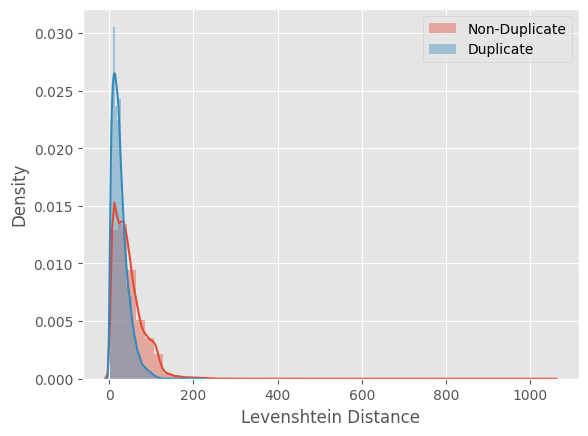

In [ ]:
df_non_duplicate = non_duplicate_questions.groupby('is_duplicate')['levenshtein_distance'].agg(['min', 'max', 'median', 'mean', 'std'])
df_duplicate = duplicate_questions.groupby('is_duplicate')['levenshtein_distance'].agg(['min', 'max', 'median', 'mean', 'std'])

# Combine the results
df_combined = df_non_duplicate.add(df_duplicate, fill_value=0)
df_combined
sns.distplot(non_duplicate_questions['levenshtein_distance'], bins=50, label='Non-Duplicate')
sns.distplot(duplicate_questions['levenshtein_distance'], bins=50, label='Duplicate')

# Add labels and legend
plt.xlabel('Levenshtein Distance')
plt.ylabel('Density')  # You may use 'Frequency' or 'Probability' depending on your preference
plt.legend()

# Show the plot
plt.show()

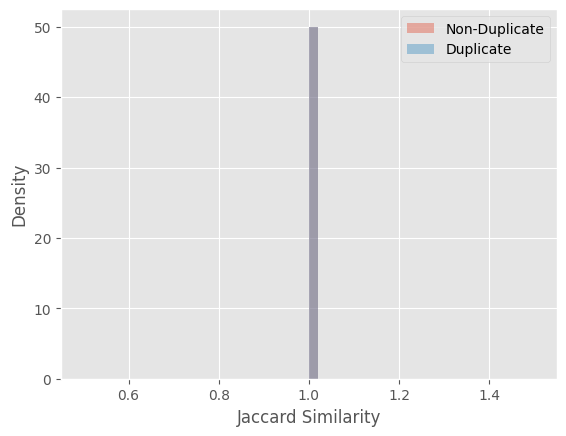

In [ ]:
df_non_duplicate = non_duplicate_questions.groupby('is_duplicate')['jaccard_similarity'].agg(['min', 'max', 'median', 'mean', 'std'])
df_duplicate = duplicate_questions.groupby('is_duplicate')['jaccard_similarity'].agg(['min', 'max', 'median', 'mean', 'std'])

# Combine the results
df_combined = df_non_duplicate.add(df_duplicate, fill_value=0)
df_combined
sns.distplot(non_duplicate_questions['jaccard_similarity'], bins=50, label='Non-Duplicate')
sns.distplot(duplicate_questions['jaccard_similarity'], bins=50, label='Duplicate')

# Add labels and legend
plt.xlabel('Jaccard Similarity')
plt.ylabel('Density')  # You may use 'Frequency' or 'Probability' depending on your preference
plt.legend()

# Show the plot
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu

# Assuming df is your DataFrame with the 'levenshtein_distance' column
levenshtein_values = duplicate_questions['levenshtein_distance']

# Define the null hypothesis value (e.g., 0 if you are testing equality to 0)
null_hypothesis_value = 8

# Perform the Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(levenshtein_values, null_hypothesis_value, alternative='greater')

# Print the results
print(f"U-statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Check the significance level (e.g., 0.05)
if p_value < 0.1:
    print("Reject the null hypothesis: Levenshtein distance is different from the null hypothesis value.")
else:
    print("Fail to reject the null hypothesis: Levenshtein distance is equal to the null hypothesis value.")

U-statistic: 63707.5
P-value: 0.11025138368099685
Fail to reject the null hypothesis: Levenshtein distance is equal to the null hypothesis value.


#Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = train_data[['question1', 'question2']]
y = train_data['is_duplicate']

# Combine 'question1' and 'question2' into a single string for each row
X['combined'] = X['question1'].astype(str) + ' ' + X['question2'].astype(str)

# Handle missing values by filling with an empty string
X['combined'] = X['combined'].fillna('')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X['combined'], y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Ensure the number of samples match
print(X_train_tfidf.shape, '  ', len(X_train))

# Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

# Predictions
predictions = classifier.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, predictions))


# Predictions
predictions = classifier.predict(X_test_tfidf)
proba_predictions = classifier.predict_proba(X_test_tfidf)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, predictions))

# AUC-ROC
auc = roc_auc_score(y_test, proba_predictions)
print(f"AUC-ROC: {auc}")

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, proba_predictions)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


(323429, 78193)    323429
Accuracy: 0.7550273318657399
[[44578  6448]
 [13360 16472]]
